
# Project: TMDb Movie analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset that has been selected for analysis is the *TMDb movie data*. The dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

We shall wrangle the data and carry out an EDA to investigate some interesting questions. We shall make extensive use of matplotlib and some inferential statistics to figure out trends in the data. 

The findings shall be communicated through a pdf document. 

>### Questions for investigation: 
Which genres are most popular from year to year?

>Is there a particular production house/ director that has consistently produced many popular movies?

>Do high revenues always correlate with high popularity?

>Have some particular cast members been the cause of high popularity?

>What kinds of properties were associated with high revenue movies and highly rated movies? Where is the similiarity between the two?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('TMDb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
df.duplicated().sum()

1

### General Properties 
There are 10866 entries/rows and 21 columns in the dataset

Most of the numeric data is clean.

Select numerical variables are available for investigation and most of them seems useful. 

### Data Cleaning
***Common problems***

From the information available, it can be noticed that there are columns which do not have complete data. For example, production companies, homepage and tag lines are not available for most movies. 

Moreover, there are columns of data that we don't require for answering the questions posed. Thus, these columns will have to be deleted. 

Duplicates may be present and they must be dealt with

Then we need to fil in the missing values. Following this, we shall check for duplicates and ddelete or combine them depending upon the circumstances. If some columns have different data, the rows shall be combined. 

Some columns need to be renamed for simplicty of reference

In [4]:
# First we drop undesired columns.
df.drop(['tagline', 'overview', 'keywords', 'release_date', 'homepage'], axis = 1, inplace = True)

In [5]:
df.columns # Undesired columns have been deleted 

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'runtime', 'genres', 'production_companies',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
# Now we check for duplicates
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace = True) # Duplicates have been dropped
df.duplicated().sum()

0

In [8]:
# we rename some columns for simplicity
df.rename(columns = {'production_companies' : 'producers'}, inplace = True)
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'runtime', 'genres', 'producers', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [68]:
years = np.sort(df['release_year'].unique())
for e in years:
    most_popular_genre = (df[df['release_year'] == e])['genres'].mode()[0]
    
popular_genres = {'Horror' : [], 'Comedy' : [], 'Drama' : []}

for e in years:
    most_popular_genre = (df[df['release_year'] == e])['genres'].mode()[0]
    if(most_popular_genre in popular_genres):
        popular_genres[most_popular_genre].append(e)
popular_genres

{'Horror': [1960, 1963, 1970, 1978],
 'Comedy': [1972,
  1975,
  1979,
  1981,
  1982,
  1983,
  1984,
  1986,
  1987,
  1989,
  1991,
  1993,
  1994,
  1995,
  1996,
  1997,
  1999,
  2000,
  2001,
  2003,
  2004,
  2007,
  2009],
 'Drama': [1961,
  1962,
  1968,
  1969,
  1971,
  1985,
  1988,
  1992,
  2005,
  2006,
  2008,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015]}

From the data above it can be seen that Comedy, Drama and Horror have been the most common genres over time

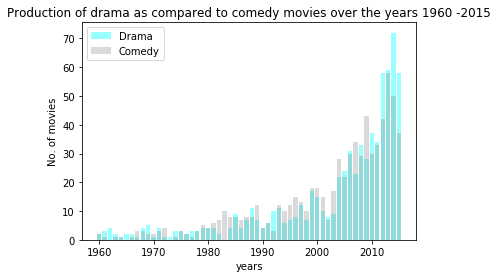

In [105]:
plt.title('Production of drama as compared to comedy movies over the years 1960 -2015')
plt.xlabel('years')
plt.ylabel('No. of movies')
x = df[df['genres'] == 'Drama']['release_year'].value_counts()
plt.bar(x.index, x.values, alpha = 0.4, color = 'cyan', label = 'Drama');
x = df[df['genres'] == 'Comedy']['release_year'].value_counts()
plt.bar(x.index, x.values, alpha = 0.29, color = 'grey', label = 'Comedy');
plt.legend();

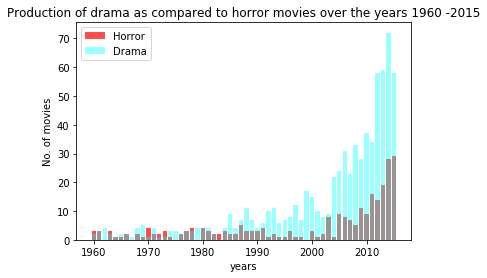

In [108]:
plt.title('Production of drama as compared to horror movies over the years 1960 -2015')
plt.xlabel('years')
plt.ylabel('No. of movies')
x = df[df['genres'] == 'Horror']['release_year'].value_counts()
plt.bar(x.index, x.values, alpha = 0.7, color = 'r', label = 'Horror');
x = df[df['genres'] == 'Drama']['release_year'].value_counts()
plt.bar(x.index, x.values, alpha = 0.4, color = 'cyan', label = 'Drama');
plt.legend();

### Research Question 2  (Replace this header name!)

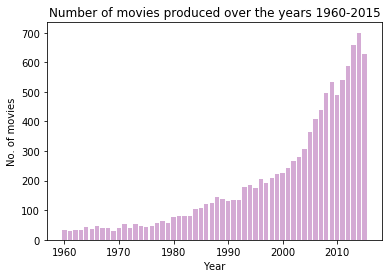

In [113]:
x = df['release_year'].value_counts()
plt.title('Number of movies produced over the years 1960-2015')
plt.xlabel('Year')
plt.ylabel('No. of movies')
plt.bar(x.index, x.values, color = 'purple', alpha = 1/3);

TypeError: boxplot() got an unexpected keyword argument 'scale'

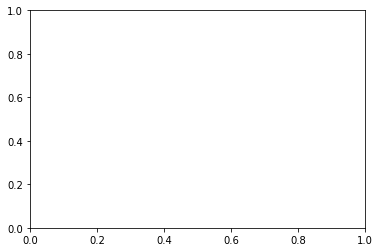

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!